*Alonso Evan*

*12/12/2019*


----------

This notebook aim to train Deep Learning. 

I am designing keras embedding layer to perform sentiment analysis. I will work on methods thaht focuses on the meaning of words. I will attemps to understand meaning and semantic relationships among words.  on  We could called thaht an image recognition task. This data is provided by Kaggle. These methods works in a way that is similar to deep approaches, such as recurrent neural networks or deep neural networks, but is computationally more efficient. 


1. [Import packages](#1)
1. [Load data](#2)
1. [Preprocessing the data](#3)
1. [Designing Neural Network Architecture](#4)
1. [Model performances](#5)
1. [Submission to Kaggle](#6)

<a id="1"></a> <br>
## Import packages

In [17]:
from importlib import reload
import sys
from imp import reload
import warnings
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")
    
    
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer
import pandas as pd

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

<a id="2"></a> <br>
## Load data

In [2]:
df1 = pd.read_csv('labeledTrainData.tsv', delimiter="\t")
df1 = df1.drop(['id'], axis=1)
print(df1.shape)
df1.head()

(25000, 2)


,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


25000 rows is great but we can have more. Let's add the IMDB database :

In [3]:
df2 = pd.read_csv('imdb_master.csv',encoding="latin-1")
df2.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


It seems than this data base is quite similar But some modification are needed to obtain the same structure.

In [4]:
df2 = df2.drop(['Unnamed: 0','type','file'],axis=1)
df2.columns = ["review","sentiment"]
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [9]:
df2['sentiment'].value_counts()

unsup    50000
neg      25000
pos      25000
Name: sentiment, dtype: int64

We need to get rid of unsup

In [5]:
df2 = df2[df2.sentiment != 'unsup']
df2['sentiment'] = df2['sentiment'].map({'pos': 1, 'neg': 0})
df2.head()

,review,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


Here we go, just one more step : concatenation

In [6]:
df = pd.concat([df1,df2]).reset_index(drop = True)
print(df.shape)
df.head()

(75000, 2)


,review,sentiment
0,With all this stuff going down at the moment w...,1
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1
2,The film starts with a manager (Nicholas Bell)...,0
3,It must be assumed that those who praised this...,0
4,Superbly trashy and wondrously unpretentious 8...,1


We increased our data with 50000 rows, nice ! It will certainly help our model to better understand the data.

<a id="3"></a> <br>
## Preprocessing the data

Now, we are going to process our data text (comments_text) to use it in the most optimal way. Those are the preprocessing steps we are going to implemente :

- Tokenization
- remove stopwords
- Use Stemmer
- Use join 

Performing this simple manipulation on data can give us confidence that a significant amount of 'noise' in our data is removed which is likely to lead to better results during the data modeling stage.

In [ ]:
regexp = RegexpTokenizer("[a-z][a-z']{2,}") 

Here we use the tokenization. Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. We clarify that we don't want any special character nor number, or word with two letter or less in the paremeter. That's why we used RegexpTokenizer instead of Tokenizer, to specify this.

In [ ]:
stop_words = set(stopwords.words("english")) 

Here, we specify a function to fitlrer our data and remove all the stopword.

But why we would do that ? Here's why, Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. It's save us time and accuracy.

In [30]:
stemmer = EnglishStemmer() 

Here, we used the package Stemmer to avoid the doublon like dogs/dog.

Let's create our function to preprocess the data :

In [ ]:
def clean_text(text):
    text = re.sub(r'[^"[a-z][a-z]{2,}"]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [word for word in text if not word in stop_words]
    text = [stemmer.stem(word) for word in text]             
    text = " ".join(text)
    return text

df['Processed_Reviews'] = df.review.apply(lambda x: clean_text(x))

In [12]:
df.head()

,review,sentiment,Processed_Reviews
0,With all this stuff going down at the moment w...,1,"stuff go moment mj i'v start listen music, wat..."
1,"\The Classic War of the Worlds\"" by Timothy Hi...",1,"\the classic war worlds\"" timothi hine enterta..."
2,The film starts with a manager (Nicholas Bell)...,0,film start manag (nichola bell) give welcom in...
3,It must be assumed that those who praised this...,0,must assum prais film (\the greatest film oper...
4,Superbly trashy and wondrously unpretentious 8...,1,superbl trashi wondrous unpretenti 80 exploita...


<a id="4"></a> <br>
## Designing Neural Network Architecture

In [35]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(df['Processed_Reviews'])
list_tokenized_train = tokenizer.texts_to_sequences(df['Processed_Reviews'])

maxlen = 130
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = df['sentiment']



embed_size = 128
model = Sequential()
model.add(Embedding(max_features, embed_size))
model.add(Bidirectional(LSTM(32, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 100
epochs = 10
history =  model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose = 2)

Train on 60000 samples, validate on 15000 samples
Epoch 1/10
 - 99s - loss: 0.3421 - accuracy: 0.8442 - val_loss: 0.2475 - val_accuracy: 0.9040
Epoch 2/10
 - 98s - loss: 0.2220 - accuracy: 0.9135 - val_loss: 0.2089 - val_accuracy: 0.9245
Epoch 3/10
 - 98s - loss: 0.1757 - accuracy: 0.9338 - val_loss: 0.1421 - val_accuracy: 0.9501
Epoch 4/10
 - 98s - loss: 0.1358 - accuracy: 0.9507 - val_loss: 0.1067 - val_accuracy: 0.9686
Epoch 5/10
 - 98s - loss: 0.0983 - accuracy: 0.9670 - val_loss: 0.0772 - val_accuracy: 0.9796
Epoch 6/10
 - 98s - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.0682 - val_accuracy: 0.9799
Epoch 7/10
 - 98s - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0269 - val_accuracy: 0.9932
Epoch 8/10
 - 98s - loss: 0.0309 - accuracy: 0.9912 - val_loss: 0.0269 - val_accuracy: 0.9935
Epoch 9/10
 - 98s - loss: 0.0256 - accuracy: 0.9923 - val_loss: 0.0204 - val_accuracy: 0.9947
Epoch 10/10
 - 102s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0152 - val_accuracy: 0.9960


<a id="5"></a> <br>
## Model performances

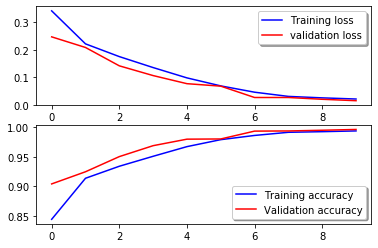

In [37]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [38]:
df_test=pd.read_csv("testData.tsv",header=0, delimiter="\t", quoting=3)
df_test.head()
df_test["review"]=df_test.review.apply(lambda x: clean_text(x))
df_test["sentiment"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
y_test = df_test["sentiment"]
list_sentences_test = df_test["review"]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
prediction = model.predict(X_te)
y_pred = (prediction > 0.5)
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(y_pred, y_test)))
print('Confusion matrix:')
confusion_matrix(y_pred, y_test)

F1-score: 0.9948070623951426
Confusion matrix:


array([[12418,    48],
       [   82, 12452]], dtype=int64)

Our model looks great !

<a id="6"></a> <br>
## Submission to Kaggle

In [85]:
# ouput submission file 
df_test = df_test[['id','sentiment']]

In [101]:
def clean_text1(text):
    text = re.sub(r'[\"]','',text, re.UNICODE)
    return text

df_test['id'] = df_test.id.apply(lambda x: clean_text1(x))

In [103]:
df_test.to_csv("submission.csv",index=False)